# Plot Concentration Inequality $(\mathcal{W}_1)$
---

### Number of Samples (N)
Once the number of training samples, $N$, is set then, we consider two scenarios:
- if ``N_is_Small==True``: $N$ ranges from $\lfloor N/10 \rfloor$ to $N$
- if ``N_is_Small==True``: $N$ ranges from $N^3$ to $N^4$

In [1]:
N = 1*(10**3)
N_is_Small = True

## Geometry of $\mathcal{X}\times \mathcal{Y}$: 
### Set the Rate at Which Embedding Distorts Geometry in As a Function of Euclidean Dimension

We consider four possible cases (``distortion_type``):
1. Worst-case (expander graph-type geometries): see paper and results of Bourgain.
2. Latent Full Binary-Tree Structure: [Gupta - Embedding Tree Metrics into Low-Dimensional Euclidean Spaces (2000); Theorem 4.1](https://link.springer.com/article/10.1007/s004540010020)
    If $\mathcal{X}\times \mathcal{Y}$ has a hierarchical structure; in that its metric is induced by a full binary tree; then Distortion 
    $$
    \tau(\phi) \le 4\,\pi*L^{1/(F-1)}\, \sqrt{\min\{F,\log(L)\}}
    ;
    $$ where $L=(k+1)/2$ for $F\in \mathbb{N}_+,\, F>1$.
3. Subsets of Euclidean space: see paper and results of Johnson and Lindentrauss as well as Matousek; roughly speaking when $k$ points can be bi-Lipschitz embedding into $\mathbb{R}^{\mathcal{O}(\log(k))}$ with low-distortion.  
4. Subspaces (metric) of the real line: $\tau(\phi)=1$.

In [2]:
distortion_type = 1

### The Structure of $\mathcal{X}$ - k vs. N

In [3]:
# Cube or no Cube?
cube_k = False

#### Case 1: Packing of the Cube $[0,1]^d$ by $k$ Points

$\mathcal{X}\subset [0,1]^d$ is a packing of $k$ points.  A simple computation shows that
$$
\operatorname{sep}(\mathcal{X})
=
    \frac{
        k^{1/d}
    }{
        2
    }
.
$$

#### Case 2: Either we set k manually or we consider the no. Points Needed to Pack a Cube:

From [George G. Lorentz, Manfred v. Golitschek, and Yuly Makovoz. Constructive approximation - Proposition 1.3](https://link.springer.com/book/9783642646102) the packing number of $[0,\operatorname{diam}]^d$ in $\ell_{\infty}^d$ by $\ell_{\infty}^d$-balls of radius $10^{-p}$ is no more than
$$
k \ge 
\Big\lceil
2^{-d}
        \,
        \Big(10^{p}*\operatorname{diam}\Big)^d
\Big\rceil
$$
we use this lower-bound to compute $k$.

### Worst-Case Lipschitz Constant

The next bit of code sets the Lipschitz constant; there are two options:
- Set Lipschitz Constant Manually (consider small classes... there is no good benchmark in this case) ``Set_Lip_Constant==True``.
- Compute Worst-Case Lipschitz constant (there are fair classical benchmarks in this case) ``Set_Lip_Constant==False``.

In [4]:
Set_Lip_Constant = False
Lip_Constant_Manual = 1

In [5]:
# If Manual 
k_manual = 1*(10**10)

# If Cube
diam = 1*(10**0)
d = 1*(10**2); print('Prototypical Space: [0,'+str(diam)+']^'+str(d))
p = 1*(10**1); print('Distance Between Points on the Grid: '+str(10**-p))

%run ./SupportFiles/Compute_N_points.ipynb

Prototypical Space: [0,1]^100
Distance Between Points on the Grid: 1e-10
We Consider The Worst-Case Lipschitz Constant: 2.5178508235883346
Number of points:1.00e+10


### In the Case of Worst-Case Lipschitz Constants, it is computed as follows:

## Import Packages and Set Global Hyperparameters

In [6]:
%run ./SupportFiles/Dependancies.ipynb
print('---')

Dependancies and Packages Loaded
---


# Set Global Parameters

## Are we Computing Risk Bounds or Concentration Bounds (in $\mathcal{W}_1$)?
- For Risk Bounds set: True
- For Concentration Bounds set: False

In [7]:
Risk_or_Concentration = False

#### Decide on How Many Points to Use?

Load Global hyperparameters, now that internal parameters have been defined.

In [8]:
%run ./SupportFiles/Global_Hyperparameters.ipynb
N_sequence = np.linspace(100,10**7,N_tests)
print('---')

Results are to Hold with Probability at-least: 95.0%
Max Representation Space Dimension (F aka m): 4.605170185988092
---


---

#### Load helper functions.

In [9]:
print('---')
%run ./SupportFiles/Helper_Functions.ipynb
print('---')

---
Helper Functions Loaded
---


## Generate Plot

#### Decide on Scale of Sample Size (Range: Small N or Large N)

In [23]:
Freq_plot = 1
indexing_set = range(10**1,10**2,Freq_plot)

In [24]:
Print_Occam = True
Agnostic_PAC_Bound = True

**Note**: If ``Set_Lip_Constant==True`` then we *do not* benchmark against the VC or Agnostic PAC bounds.

---

Load risk bound functions.

In [25]:
%run ./SupportFiles/Concentration_Inequality_Engine.ipynb

Concentration Inequality Loaded


---

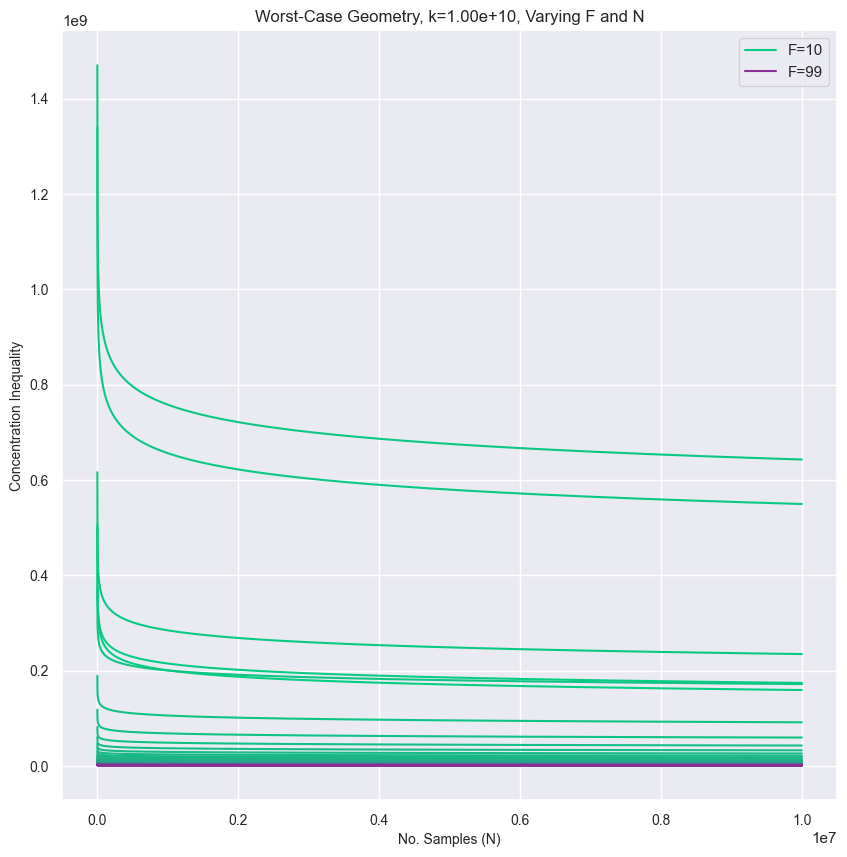

In [30]:
ax = plt.figure(figsize=(10,10))
sns.set_style("darkgrid")

plt.title(''+dist_name+', k='+str('{:.2e}'.format(k))+', Varying F and N')
    

plt.xlabel('No. Samples (N)')
plt.ylabel('Bound on $\mathbb{E}[\mathcal{W}_1(\mathbb{P},\mathbb{P}^N)]$')



# Set Max No Colours
n_col=max(indexing_set)+2


#### Plot Generation
for i in indexing_set:
    # Set Value of F
    F_global = int(np.round(i,0))
    
    # Write Function of N only
    def get_concentration_inequality__scalar__N(N):
        return get_concentration_inequality__scalar(k=k_global,F=F_global,N=N)
    
    get_concentration_inequality__N = np.vectorize(get_concentration_inequality__scalar__N)
    
    # Compute Risk Bound
    Risk_Bounds = get_concentration_inequality__N(N_sequence)

    
    # Plot
    col_index = (i-min(indexing_set))/(max(indexing_set)+1)
    # Plot Risk-Bound
    plot_ratio =int(max(indexing_set)/max(1,Freq_plot*10))  # plot small subset of rep. dims.
    
    if i == min(indexing_set) or i == max(indexing_set):
        plt.plot(N_sequence, 
             Risk_Bounds,
             color=colorFader(c1,c2,col_index),
             label = 'F='+str(F_global).format(i=i))
    else:
        plt.plot(N_sequence, 
                 Risk_Bounds,
                 color=colorFader(c1,c2,col_index),label='_nolegend_')

plt.legend()
    
    
plt.xlabel('No. Samples (N)',fontsize=10)
plt.ylabel('Concentration Inequality',fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# ----------------------------------------------------- #

plt.savefig('Experiments/Concentration_Inequalities/CI_'+str(N_is_Small)+'____'+str(dist_name__plot)+'___d____'+str(d)+'.pdf')
plt.show()

In [31]:
print('N Min: '+latex_float(N_min))
print('N Max: '+latex_float(N_max))
print('For Paper:')
print(latex_float(N_min)+'<N<'+latex_float(N_max))
print('dimension: '+latex_float(d))
print('N. Points (k): '+latex_float(k_manual))

N Min: 1 \times 10^{2}
N Max: 1 \times 10^{3}
For Paper:
1 \times 10^{2}<N<1 \times 10^{3}
dimension: 1 \times 10^{2}
N. Points (k): 1 \times 10^{10}


---
# Fin #
---

---

---